# House Prices Predictive Model

# 4 - Modelling

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.gaussian_process import GaussianProcessRegressor

In [3]:
df = pd.read_csv('../data/house_refined_data_cleaned.csv')
scaled_train_X = np.genfromtxt('../data/scaled_train_X.csv', delimiter=",")
scaled_test_X = np.genfromtxt('../data/scaled_test_X.csv', delimiter=",")
y_train = np.genfromtxt('../data/train_y.csv', delimiter=",")
y_test = np.genfromtxt('../data/test_y.csv', delimiter=",")

## SVM

In [4]:
model = svm.SVC()
model.fit(scaled_train_X, y_train)

SVC()

### Initial Predictions

In [5]:
y_test_pred = model.predict(scaled_test_X)
y_train_pred = model.predict(scaled_train_X)

In [6]:
print('Our training data scores as',str(r2_score(y_train,y_train_pred)))

Our training data scores as 0.6006294606232587


In [7]:
print('Our testing data scores as',str(r2_score(y_test,y_test_pred)))

Our testing data scores as 0.07161644913112608


#### The model is overfitting to a great extent, so I will now put a restriction on max_iter.

### Define max_iter param

In [8]:
model = svm.SVC(max_iter=3)
model.fit(scaled_train_X, y_train)

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=3)

### Predictions with max_iter defined as 3

In [9]:
y_test_pred = model.predict(scaled_test_X)
y_train_pred = model.predict(scaled_train_X)

In [10]:
r2_score(y_train,y_train_pred)

0.7012803139064598

In [11]:
r2_score(y_test,y_test_pred)

0.17023091294835757

#### While this is a resonable improvement, I want to hypertune some of the parameters, to get the ideal model. I could play with this model all day, and have great fun predicting how the changes I make will impact my model, but I would not ever stumble across a better model than could be found by hypertuning my parameters via RandomizedSearchCV.

### Hyperparameter tuning with RandomizedSearchCV

In [12]:
model = svm.SVC()
distributions = dict(max_iter=range(0,15),C=np.arange(1.0,10.0,.1), kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'] )
clf = RandomizedSearchCV(model, distributions, random_state=0)
search = clf.fit(scaled_train_X, y_train)
search.best_params_

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or

{'max_iter': 13, 'kernel': 'sigmoid', 'C': 2.300000000000001}

## Implement SVM with optimal params

In [13]:
model = svm.SVC(C=2.3, kernel='sigmoid', max_iter=13)
model.fit(scaled_train_X, y_train)
y_test_pred = model.predict(scaled_test_X)
y_train_pred = model.predict(scaled_train_X)

print(r2_score(y_train,y_train_pred))

print(r2_score(y_test,y_test_pred))

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=13).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


0.4226354468950263
0.3254113320645843


### Examine data

In [14]:
diff = np.array(y_test_pred - np.array(y_test))
print(y_test_pred[259], y_test[259])
print(len(y_test_pred), len(y_test))
print(np.mean(diff))
print(np.mean(np.delete(diff, 259)))
y_test_pred = np.delete(y_test_pred, 259)
print(y_test)
y_test_arr = np.delete(y_test, 259)
print(y_test)
print(len(y_test_pred), len(y_test_arr))
y_test_arr=np.array(y_test_arr)
for idx, val in enumerate(y_test_pred):
    print(np.abs(diff[idx]))
    if diff[idx] != 0:
        y_test_pred[idx] = y_test_pred[idx] + np.log(np.abs(diff[idx]))
print('r2 after removing outlier', str(r2_score(y_test_arr,y_test_pred)))

320000.0 1600000.0
292 292
-18522.54109589041
-14187.567010309278
[ 200624.  133000.  110000.  192000.   88000.   85000.  282922.  141000.
  745000.  148800.  208900.  136905.  225000.  123000.  119200.  145000.
  190000.  123600.  149350.  155000.  166000.  144500.  110000.  174000.
  185000.  168000.  177500.   84500.  320000.  118500.  110000.  213000.
  156000.  250000.  372500.  175000.  277500.  112500.  263000.  325000.
  243000.  130000.  164990.  280000.  403000.  119000.  125000.  128200.
  172500.   84900.  412500.  156000.  167900.  100000.  275000.  123000.
  132000.  239900.  139000.  115000.  137500.  135000.  134450.  180500.
  193500.  156500.  132000.  224500.  139000.  225000.  188500.  118000.
   82000.  392000.  112000.  248900.  134500.   79500.  320000.  158000.
  140000.  136500.  107500.  145000.  200500.  185000.  105000.  202665.
  186000.  136000.  200500.  190000.  187500.  200000.  172500.  157000.
  213000.  185000.  124500.  162900.  260000.  198500.  12

#### Here I recognized that an outlier skewed the outcome heavily, as removing said outlier resulted in an improved r2 score over even that of the training score, so I am content with this outcome. I should have removed this outlier from the outset, however, I underestimated the impact it could have on the model.

### Gaussian Naive Bayes model

In [18]:
gnb = GaussianNB()
y_pred = gnb.fit(scaled_train_X, y_train).predict(scaled_test_X)
print('r2 for gnb was:',str(r2_score(y_test_arr,np.delete(y_pred,259))))
diff = np.array(y_test_pred - y_test_arr)
print(diff.max())
print(diff.min())
print(np.mean(diff))
mislabeled = []

for i in range(0, len(y_test)):
    mislabeled.append(y_test[i] != y_train[i])
print("Number of mislabeled points out of a total %d points : %d", (scaled_test_X.shape[0]), pd.Series(mislabeled).value_counts()[True])
np.sort(diff)

r2 for gnb was: -0.5820893370782745
132511.7943379244
-454986.97194730205
-14177.843595261054
Number of mislabeled points out of a total %d points : %d 292 291


array([-4.54986972e+05, -3.24988023e+05, -2.77987465e+05, -2.11987736e+05,
       -1.92487832e+05, -1.85285870e+05, -1.82487885e+05, -1.78767906e+05,
       -1.64988297e+05, -1.58991146e+05, -1.56238041e+05, -1.41988136e+05,
       -1.37282170e+05, -1.20866998e+05, -1.17388327e+05, -1.14988347e+05,
       -1.12988365e+05, -1.12988365e+05, -1.11988374e+05, -1.04988438e+05,
       -1.02988458e+05, -1.01588471e+05, -9.89104979e+04, -9.49885384e+04,
       -8.49907997e+04, -7.94888296e+04, -7.59887615e+04, -7.54887681e+04,
       -7.49887748e+04, -7.19888156e+04, -7.09888296e+04, -6.49889179e+04,
       -6.18889667e+04, -5.99905082e+04, -5.99889979e+04, -5.89890147e+04,
       -5.39891033e+04, -5.24891314e+04, -5.09891604e+04, -5.04891703e+04,
       -4.99891802e+04, -4.94891903e+04, -4.89873084e+04, -4.78892231e+04,
       -4.69892421e+04, -4.69892421e+04, -4.49892856e+04, -4.49892856e+04,
       -4.39904181e+04, -4.18893570e+04, -4.09902019e+04, -4.04893909e+04,
       -4.04893909e+04, -

#### The Gaussian Naive-Bayes model above strongly suggests a dependence of multiple variables, as this model treats variables as completely independent of one another. Below I will select the most strongly correlated variables to the target variable sale price and try again to optimize the outcome.

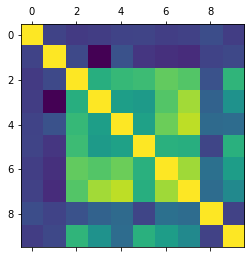

,Id,MSSubClass,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,SalePrice,TotalSF,HasPool,YearBuilt
Id,1.000000,0.011156,-0.028365,-0.015415,0.008273,0.013672,-0.009889,-0.000322,0.055511,-0.012713
MSSubClass,0.011156,1.000000,0.032628,-0.238518,0.074853,-0.044390,-0.066780,-0.082225,0.008610,0.027850
OverallQual,-0.028365,0.032628,1.000000,0.537808,0.593007,0.609512,0.702909,0.668155,0.073907,0.572323
TotalBsmtSF,-0.015415,-0.238518,0.537808,1.000000,0.454868,0.437908,0.669013,0.826742,0.151236,0.391452
GrLivArea,0.008273,0.074853,0.593007,0.454868,1.000000,0.469594,0.723989,0.874373,0.189397,0.199010
GarageCars,0.013672,-0.044390,0.609512,0.437908,0.469594,1.000000,0.547258,0.539715,0.022192,0.546073
SalePrice,-0.009889,-0.066780,0.702909,0.669013,0.723989,0.547258,1.000000,0.821549,0.220364,0.450210
TotalSF,-0.000322,-0.082225,0.668155,0.826742,0.874373,0.539715,0.821549,1.000000,0.197624,0.347133
HasPool,0.055511,0.008610,0.073907,0.151236,0.189397,0.022192,0.220364,0.197624,1.000000,0.005953
YearBuilt,-0.012713,0.027850,0.572323,0.391452,0.199010,0.546073,0.450210,0.347133,0.005953,1.000000


In [19]:
# run correlation matrix to find best fit variables
plt.matshow(df.corr())
plt.show()
df.corr()

In [20]:
X=df[['TotalSF','GrLivArea']].to_numpy()
df_train_X, df_test_X, df_train_y, df_test_y = train_test_split(X, df['SalePrice'].to_numpy(),test_size=.2)
y_pred = gnb.fit(df_train_X, df_train_y).predict(df_test_X)
print('r2 for gnb was:',str(r2_score(df_test_y,y_pred)))

r2 for gnb was: 0.5718638710382984


#### Here I was able to make a considerable improvement by using only the two most strongly correlated variables,

### Random Forest model

In [21]:
clf = RandomForestClassifier(max_depth=2, random_state=1234)
clf.fit(scaled_train_X, y_train)
y_pred = clf.predict(scaled_test_X)
print(r2_score(np.delete(y_test,259), np.delete(y_pred, 259)))

-0.5613844108534563


### Hyperparameter tuning with RandomizedSearchCV

In [98]:
model = RandomForestClassifier()
distributions = dict(max_depth=range(0,15),n_estimators=[1,2,3,4,5,8,15,27,42,70,100,200], random_state=[1234])
clf = RandomizedSearchCV(model, distributions, scoring="r2")
search = clf.fit(scaled_train_X, y_train)
print(search.best_params_)
print(search.best_score_)

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'random_state': 1234, 'n_estimators': 42, 'max_depth': 10}
0.6778245389248866


In [96]:
clf = RandomForestClassifier(max_depth=11, n_estimators=70,random_state=1234)
clf.fit(scaled_train_X, y_train)
y_pred = clf.predict(scaled_test_X)

In [97]:
print(r2_score(np.delete(y_test,259), np.delete(y_pred, 259)))

0.7173948804280998


#### The RandomForestClassifier is the better model, with an r2 of about 1 tenth higher than the SVM model.

In [ ]:
diff = np.array(np.delete(y_pred, 259) - np.array(y_test))
print(diff.min(), diff.max())